In [1]:
import os
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# get data

In [2]:
datapath = r"./data/"
#outputs = "../outputs/"

In [ ]:
#df_train = pd.read_csv(os.path.join(datapath,'ESC2013_RMSP_CEM.csv'))
#df_train = pd.read_csv(os.path.join(datapath,'RendimentoEscolar2000-2015.csv')) #, encoding='latin-1'
#df_test = pd.read_csv(os.path.join(datapath,'ENEM2015.csv'))

In [3]:
#df_train = pd.read_csv(os.path.join(datapath,'ESC2013_RMSP_CEM.csv'))
data = pd.read_csv(os.path.join(datapath,'RendimentoEscolar2000-2015.csv')) #, encoding='latin-1'

enem = pd.read_csv(os.path.join(datapath,'ENEM2015.csv'))
enem.rename(columns={'Classificacao':'y', 'CODIGO DA ENTIDADE': 'CODMEC'}, inplace=True)

D:\Users\Marcelo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
dados_escolares = pd.read_csv(os.path.join(datapath,'DadosEscolares1996-2015.csv'))  #, encoding='latin-1'
dados_escolares.drop(['DEP', 'NOME', 'SETEDU', 'DISTRITO07', 'SUBPREF', 'CORED', 'ZONA'], axis=1, inplace=True)

In [127]:
esc = pd.read_csv(os.path.join(datapath,'ESC2013_RMSP_CEM.csv'))  #, encoding='latin-1'

activate this to detect duplicate columns
* for c in list(df_train.columns):
*    if c.endswith('x'):
*        print(c)

keep dados_escolares only for year 2015

In [5]:
dados_escolares = dados_escolares[dados_escolares.ANO == 2015]

### check missing obs between datasets before merge operation

In [6]:
print("size of dados_escolares:",len(dados_escolares))
print("size of rendimentos:",len(data))

size of dados_escolares: 7127
size of rendimentos: 14944


In [7]:
len(set(dados_escolares['CODMEC']))

7127

In [8]:
print("missing from rendimentos", len(set(dados_escolares['CODMEC']) - set(data['CODMEC'])))
print("missing from dados_escolares", len(set(data['CODMEC']) - set(dados_escolares['CODMEC'])))

missing from rendimentos 2248
missing from dados_escolares 13


# merge datasets

In [78]:
#df_train = df_train.merge(dados_escolares, left_on='CODMEC', right_on='CODMEC', how="outer")
#df_train.rename(columns={'MAIS EDUCAÃ‡ÃƒO':'MAIS EDUCACAO', 'SITUAÃ‡ÃƒO': 'SITUACAO'}, inplace=True)

In [9]:
data = data.merge(dados_escolares, left_on='CODMEC', right_on='CODMEC', how="outer")
data.rename(columns={'MAIS EDUCAÃ‡ÃƒO':'MAIS EDUCACAO', 'SITUAÃ‡ÃƒO': 'SITUACAO'}, inplace=True)

In [10]:
print("missing from data", len(set(enem['CODMEC']) - set(data['CODMEC'])))
print("missing from Y", len(set(data['CODMEC']) - set(enem['CODMEC'])))

missing from data 550
missing from Y 6447


In [11]:
data = data.merge(enem, left_on='CODMEC', right_on='CODMEC', how='inner')

In [12]:
data.head()

,CODMEC,ANO_x,DEP,NOME,SETEDU,DISTRITO07,SUBPREF,CORED,ZONA,EFABAND9ANOS1S,...,EE_Creche,EE_Pre,EE_Fund,EE_Med,EE_EJA,EE_EP,ALEDESP,TOTAL_ALUNOS,NUMERO DE PARTICIPANTES,y
0,35054082,2014.0,MUNICIPAL,"LINNEU PRESTES, PROF.",7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1205.0,51,1
1,35054082,2013.0,MUNICIPAL,"LINNEU PRESTES, PROF.",7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1205.0,51,1
2,35054082,2012.0,Municipal,EMEFM LINNEU PRESTES PROF,7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1205.0,51,1
3,35054082,2011.0,Municipal,EMEFM LINNEU PRESTES PROF,7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1205.0,51,1
4,35054082,2010.0,Municipal,LINNEU PRESTES PROF EMEFM,7102,SANTO AMARO,SANTO AMARO,SANTO AMARO,SUL,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1205.0,51,1


In [13]:
data.tail()

,CODMEC,ANO_x,DEP,NOME,SETEDU,DISTRITO07,SUBPREF,CORED,ZONA,EFABAND9ANOS1S,...,EE_Creche,EE_Pre,EE_Fund,EE_Med,EE_EJA,EE_EP,ALEDESP,TOTAL_ALUNOS,NUMERO DE PARTICIPANTES,y
763,35923473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1456.0,100,2
764,35923795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,17,1
765,35924398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,610.0,44,1
766,35925871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1424.0,134,2
767,35990012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1427.0,122,3


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Columns: 336 entries, CODMEC to y
dtypes: float64(315), int64(3), object(18)
memory usage: 2.0+ MB


In [15]:
data['CODMEC'].unique().size

693

In [16]:
data.columns

Index(['CODMEC', 'ANO_x', 'DEP', 'NOME', 'SETEDU', 'DISTRITO07', 'SUBPREF',
       'CORED', 'ZONA', 'EFABAND9ANOS1S',
       ...
       'EE_Creche', 'EE_Pre', 'EE_Fund', 'EE_Med', 'EE_EJA', 'EE_EP',
       'ALEDESP', 'TOTAL_ALUNOS', 'NUMERO DE PARTICIPANTES', 'y'],
      dtype='object', length=336)

In [17]:
data.describe()

,CODMEC,ANO_x,EFABAND9ANOS1S,EFABAND9ANOS2S,EFABAND9ANOS3S,EFABAND9ANOS4S,EFABAND9ANOS5S,EFABAND9ANOS6S,EFABAND9ANOS7S,EFABAND9ANOS8S,...,EE_Creche,EE_Pre,EE_Fund,EE_Med,EE_EJA,EE_EP,ALEDESP,TOTAL_ALUNOS,NUMERO DE PARTICIPANTES,y
count,7.680000e+02,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,768.0,768.0,768.0,768.0,768.0,768.0,768.000000,768.000000,768.000000,768.000000
mean,3.516702e+07,2013.965517,0.034483,0.017241,0.017241,0.018966,0.020690,0.015517,0.039655,0.036207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.032552,862.649740,60.890625,2.055990
std,1.921837e+05,3.104209,0.217182,0.142925,0.194162,0.222993,0.154113,0.149035,0.367242,0.300373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.637983,558.119889,61.978513,0.689455
min,3.500014e+07,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,54.000000,10.000000,0.000000
25%,3.510030e+07,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,466.000000,22.000000,2.000000
50%,3.512419e+07,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,769.500000,42.000000,2.000000
75%,3.516531e+07,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1144.750000,72.000000,2.000000
max,3.599001e+07,2015.000000,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,6.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,4448.000000,488.000000,4.000000


### remove duplicates

In [18]:
data.sort_values(by=['ANO_x'], ascending=False, inplace=True)
data.drop_duplicates(keep='first',inplace=True) 

# checking types

the dataframe has 3 types of data: int, float and object (string)

In [19]:
for cat in data.columns:
    if data[cat].dtypes != 'int64' and data[cat].dtypes != 'float64' and data[cat].dtypes != 'object':
        print(data[cat].dtypes)

In [20]:
data.dtypes[data.dtypes.map(lambda x: x=='int64')][:10]

CODMEC                     int64
NUMERO DE PARTICIPANTES    int64
y                          int64
dtype: object

In [21]:
data.dtypes[data.dtypes.map(lambda x: x=='float64')][:10]

ANO_x             float64
EFABAND9ANOS1S    float64
EFABAND9ANOS2S    float64
EFABAND9ANOS3S    float64
EFABAND9ANOS4S    float64
EFABAND9ANOS5S    float64
EFABAND9ANOS6S    float64
EFABAND9ANOS7S    float64
EFABAND9ANOS8S    float64
EFABAND9ANOS9S    float64
dtype: object

In [22]:
data.dtypes[data.dtypes.map(lambda x: x=='object')]

DEP               object
NOME              object
SETEDU            object
DISTRITO07        object
SUBPREF           object
CORED             object
ZONA              object
EJATOTAL,,        object
TIPOESC           object
DEPADM            object
MAIS EDUCACAO     object
MERENDA           object
DTURNOS - EMEF    object
T2D3D - EMEF      object
DTURNOS-EMEI      object
T2D3D - EMEI      object
TIPOENSEJA        object
TIPO_EE           object
dtype: object

# checking categorical data

For columns with string data, evaluate how many categories each columns has

remove columns where one-hot-encoding would not be efficient

In [23]:
for cat in data.columns:
    if data[cat].dtypes == 'object':
        print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, data[cat].unique().size))
        if  data[cat].unique().size >= 10: 
            data.drop(cat, axis=1, inplace=True)
            print("REMOVED: ", cat)

Number of levels in category 'DEP':  4.00 
Number of levels in category 'NOME':  527.00 
REMOVED:  NOME
Number of levels in category 'SETEDU':  13.00 
REMOVED:  SETEDU
Number of levels in category 'DISTRITO07':  87.00 
REMOVED:  DISTRITO07
Number of levels in category 'SUBPREF':  32.00 
REMOVED:  SUBPREF
Number of levels in category 'CORED':  14.00 
REMOVED:  CORED
Number of levels in category 'ZONA':  6.00 
Number of levels in category 'EJATOTAL,,':  9.00 
Number of levels in category 'TIPOESC':  4.00 
Number of levels in category 'DEPADM':  1.00 
Number of levels in category 'MAIS EDUCACAO':  1.00 
Number of levels in category 'MERENDA':  1.00 
Number of levels in category 'DTURNOS - EMEF':  1.00 
Number of levels in category 'T2D3D - EMEF':  2.00 
Number of levels in category 'DTURNOS-EMEI':  1.00 
Number of levels in category 'T2D3D - EMEI':  1.00 
Number of levels in category 'TIPOENSEJA':  1.00 
Number of levels in category 'TIPO_EE':  2.00 


### looking for more possible categorical data

In [79]:
count = 0
for cat in data.columns:
    if data[cat].dtypes == 'object': continue
    if data[cat].unique().size > 3: continue
    count += 1
    if count < 10: #if you want to print all columns, remove this condition
        print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, data[cat].unique().size))
        print("    Unique values: \b {}".format(data[cat].unique()))

Number of levels in category 'CONCLUINTES_EF':  2.00 
    Unique values:  [ 0. nan]
Number of levels in category 'CLEM4S':  2.00 
    Unique values:  [0. 1.]
Number of levels in category 'EE_Ret_MED':  3.00 
    Unique values:  [ 0. nan  1.]
Number of levels in category 'EE_VIS_CRE':  2.00 
    Unique values:  [ 0. nan]
Number of levels in category 'EE_BVIS_CRE':  2.00 
    Unique values:  [ 0. nan]
Number of levels in category 'EE_AUD_CRE':  3.00 
    Unique values:  [ 0. nan  3.]
Number of levels in category 'EE_BAUD_CRE':  2.00 
    Unique values:  [ 0. nan]
Number of levels in category 'EE_Surdo_Cegueira_CRE':  2.00 
    Unique values:  [ 0. nan]
Number of levels in category 'EE_FIS_CRE':  3.00 
    Unique values:  [ 0. nan  1.]


We see that those are not categorical data but simply data with too many missing in general. We will deal with that later.

Now let us remove features with constant values

In [80]:
temp = []
for col in data.columns:
    if data[col].unique().size <= 1: 
        print("REMOVED: ", col)
        temp.append(col)
        data.drop(col, axis=1, inplace=True)
print(temp)

[]


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 290 to 767
Columns: 261 entries, CODMEC to y
dtypes: float64(252), int64(3), object(6)
memory usage: 1.5+ MB


# Dealing with highly correlated variables
We are going to delete variables with a correlation above some threshold with another variable

In [27]:
def clear_correlated_data(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= abs(threshold)) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
    return dataset
    #print(dataset)

In [28]:
threshold = 0.8
data = clear_correlated_data(data, threshold)

### visualize correlations

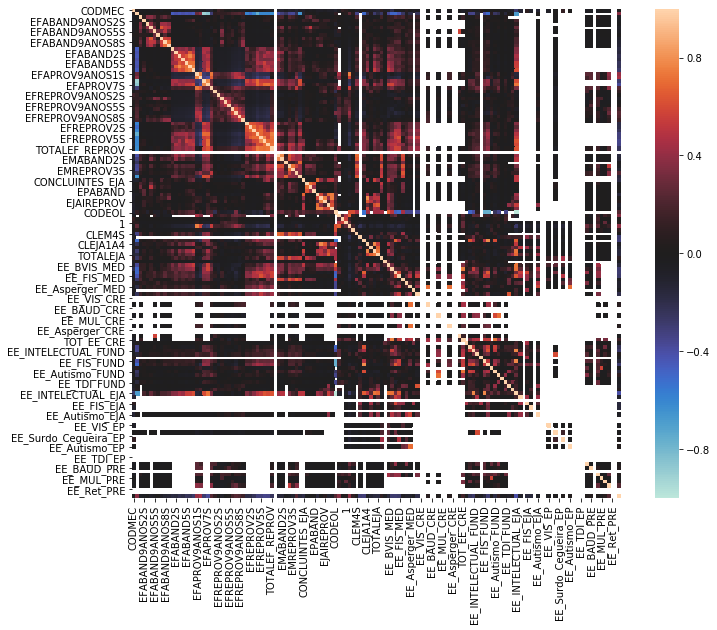

In [29]:
#correlation matrix
corrmatrix = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, square=True, center=0) #cmap=BrBG

we see that more than 100 features were removed

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 290 to 767
Columns: 144 entries, CODMEC to y
dtypes: float64(136), int64(2), object(6)
memory usage: 870.0+ KB


# missing data

In [31]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head(20)

,total,percent
T2D3D - EMEF,688,0.895833
CODEOL,687,0.894531
EE_TDI_CRE,584,0.760417
EE_BVIS_CRE,584,0.760417
EE_BAUD_CRE,584,0.760417
EE_Surdo_Cegueira_CRE,584,0.760417
EE_FIS_CRE,584,0.760417
EE_MUL_CRE,584,0.760417
EE_SUP_CRE,584,0.760417
EE_Autismo_CRE,584,0.760417


removing variables if missing data > 80%

In [32]:
data.drop((missing_data[missing_data['percent'] > 0.8]).index,1, inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 290 to 767
Columns: 142 entries, CODMEC to y
dtypes: float64(135), int64(2), object(5)
memory usage: 858.0+ KB


# machine learning

In [76]:
import warnings; warnings.simplefilter('ignore')

In [145]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
#from sklearn.metrics import log_loss

## split data

In [45]:
X = data.iloc[:, 1:-1]

In [46]:
X.head()

,ANO_x,DEP,ZONA,EFABAND9ANOS1S,EFABAND9ANOS2S,EFABAND9ANOS3S,EFABAND9ANOS4S,EFABAND9ANOS5S,EFABAND9ANOS6S,EFABAND9ANOS7S,...,EE_BVIS_PRE,EE_BAUD_PRE,EE_Surdo_Cegueira_PRE,EE_FIS_PRE,EE_MUL_PRE,EE_SUP_PRE,EE_Asperger_PRE,EE_Ret_PRE,EE_TDI_PRE,TIPO_EE
290,2015.0,PARTICULAR,SUL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
435,2015.0,PARTICULAR,OESTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
383,2015.0,PARTICULAR,NORTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
384,2015.0,PARTICULAR,NORTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
385,2015.0,PARTICULAR,SUL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [38]:
y = data.iloc[:, -1:]

temporarily remove categorical data until one-hot-encoding it

In [47]:
X.drop(['DEP', 'ZONA', 'EJATOTAL,,', 'TIPOESC', 'TIPO_EE'], axis=1, inplace=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## build pipeline with preprocessing steps
Preprocessing steps:
* StandardScaler will standardize data
* Imputer will deal with missing data

gridsearchcv works great with pipeline. So we are going to use it to find the best parameters.

We will start prediction with SVM as our baseline

In [94]:
from sklearn.svm import SVC

In [149]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('svm', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'svm__C':[1, 10, 100],
              'svm__gamma':[0.1, 0.01]}

# Instantiate the GridSearchCV object: clf_svm
clf_svm = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_svm.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf_svm.predict(X_test)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_svm.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_svm.best_score_))
print("\nCLASSIFICATION_REPORT:\n", classification_report(y_test, y_pred))
#print("\nLOG LOSS:\n", logloss_svm)



TUNED MODEL PARAMETERS:
 {'svm__C': 1, 'svm__gamma': 0.01}

TUNED ACCURACY:
 0.7225325884543762

CLASSIFICATION_REPORT:
               precision    recall  f1-score   support

           1       0.93      0.36      0.52        36
           2       0.69      0.99      0.82       151
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        15

    accuracy                           0.71       231
   macro avg       0.40      0.34      0.33       231
weighted avg       0.60      0.71      0.61       231



an alternative for imputation would be to drop rows when missing

In [ ]:
data_nomissing = data.dropna()

but in this case we reduce the dataset to just 82 entries. So we won't do that.

In [75]:
data_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 290 to 213
Columns: 142 entries, CODMEC to y
dtypes: float64(135), int64(2), object(5)
memory usage: 91.6+ KB


we could drop columns instead of rows, but there would remain too few features. The code for doing this is:
* total = data.isnull().sum().sort_values(ascending=False)
* missing_data = pd.concat([total], axis=1, keys=['total'])
* data_nomissing = data.drop((missing_data[missing_data['total'] > 1]).index,1)

So we are going to test with other ML models, then choose best parameters with crossvalidation, then choose the best model.

# logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [169]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)

#LogisticRegression()

# Specify the hyperparameter space
c_space = np.logspace(-5, 8, 15)
parameters = {'logreg__C': c_space, 'logreg__penalty': ['l1', 'l2']}

# Instantiate the GridSearchCV object: cv
clf_logreg = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf_logreg.predict(X_test)

# Using loss function
#y_pred_prob = cv.predict_proba(X_test)
#logloss_svm = log_loss(y_test,y_pred_prob, labels=[0,1,2,3,4])

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_logreg.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_logreg.best_score_))
print("\nCLASSIFICATION_REPORT:\n", classification_report(y_test, y_pred))


TUNED MODEL PARAMETERS:
 {'logreg__C': 0.4393970560760795, 'logreg__penalty': 'l1'}

TUNED ACCURACY:
 0.74487895716946

CLASSIFICATION_REPORT:
               precision    recall  f1-score   support

           1       0.75      0.58      0.66        36
           2       0.72      0.91      0.81       151
           3       0.33      0.03      0.06        29
           4       0.56      0.33      0.42        15

    accuracy                           0.71       231
   macro avg       0.59      0.47      0.49       231
weighted avg       0.67      0.71      0.66       231



# other classifiers

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'rfc__max_features':[1, 2, "auto", "log2", None],
              'rfc__n_estimators':[300]}

# Instantiate the GridSearchCV object: clf_rforest
clf_rforest = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_rforest.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf_rforest.predict(X_test)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_rforest.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_rforest.best_score_))


TUNED MODEL PARAMETERS:
 {'rfc__max_features': 'auto', 'rfc__n_estimators': 300}

TUNED ACCURACY:
 0.7355679702048417


In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [151]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('adaboost', AdaBoostClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'adaboost__n_estimators':[300]}

# Instantiate the GridSearchCV object: clf_adaboost
clf_adaboost = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_adaboost.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf_adaboost.predict(X_test)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_adaboost.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_adaboost.best_score_))
print("\nCLASSIFICATION_REPORT:\n", classification_report(y_test, y_pred))


TUNED MODEL PARAMETERS:
 {'adaboost__n_estimators': 300}

TUNED ACCURACY:
 0.5418994413407822

CLASSIFICATION_REPORT:
               precision    recall  f1-score   support

           1       0.31      0.83      0.45        36
           2       0.61      0.07      0.13       151
           3       0.15      0.59      0.23        29
           4       0.00      0.00      0.00        15

    accuracy                           0.25       231
   macro avg       0.27      0.37      0.20       231
weighted avg       0.47      0.25      0.19       231



In [136]:
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('gbc', GradientBoostingClassifier())]

pipeline = Pipeline(steps)
 
# Specify the hyperparameter space
parameters = {'gbc__max_features':[1, 2, "auto", "log2", None],
              'gbc__n_estimators':[300],
              'gbc__loss':['deviance']}

# Instantiate the GridSearchCV object: clf_gbc
clf_gbc = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_gbc.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf_gbc.predict(X_test)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_gbc.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_gbc.best_score_))


TUNED MODEL PARAMETERS:
 {'gbc__loss': 'deviance', 'gbc__max_features': 2, 'gbc__n_estimators': 300}

TUNED ACCURACY:
 0.7392923649906891


In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
# Setup the pipeline
steps = [('imputation', Imputer(strategy='median', axis=0)),
         ('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
 
# Specify the hyperparameter space
parameters = {'knn__n_neighbors':[1, 3, 5, 10, 15, 20, 50],
              'knn__weights':['uniform', 'distance'],
              'knn__algorithm':['auto']}

# Instantiate the GridSearchCV object: clf_knn
clf_knn = GridSearchCV(pipeline,parameters, cv=5)

# Fit to the training set
clf_knn.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf_knn.predict(X_test)

# Compute and print metrics
print("\nTUNED MODEL PARAMETERS:\n {}".format(clf_knn.best_params_))
print("\nTUNED ACCURACY:\n {}".format(clf_knn.best_score_))


TUNED MODEL PARAMETERS:
 {'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}

TUNED ACCURACY:
 0.7355679702048417


# Plot results

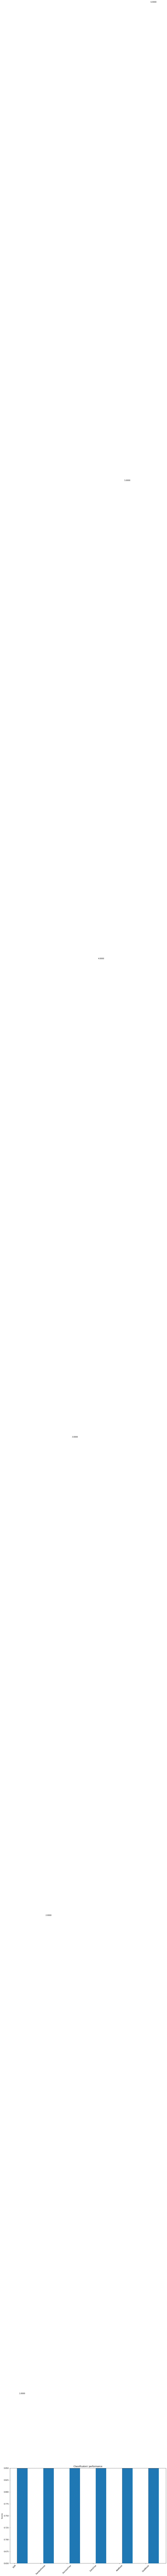

In [168]:
dic_results = {'SVM': 1,
               'RandomForest': 2,
               'DecisionTree': 3,
               'ExtraTree': 4,
               'AdaBoost': 5,
               'GradBoost': 6,
              }

import operator
tup_results = sorted(dic_results.items(), key=operator.itemgetter(1))

N = len(dic_results)
ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
rects = ax.bar(ind+0.5, list(zip(*tup_results))[1], width,)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 
            1.005*height, 
            '{0:.4f}'.format(height), 
            ha='center', 
            va='bottom',)

ax.set_ylabel('Scores')
ax.set_ylim(ymin=0.65,ymax = 0.85)
ax.set_title("Classificators' performance")
ax.set_xticks(ind + width/2.)
ax.set_xticklabels(list(zip(*tup_results))[0], rotation=45)

plt.show()

# Voting classifier
not worked yet. might not be used

In [ ]:
from sklearn.ensemble import VotingClassifier 

In [ ]:
ensemble = VotingClassifier(estimators=[('clf_svm', clf_svm),
                                        ('clf_rforest', clf_rforest),
                                        ('clf_adaboost', clf_adaboost),
                                        ('clf_gbc', clf_gbc),
                                        ('clf_knn', clf_knn),
                                        ],
                            voting='soft',
                            weights=[2,2,1,6,2]).fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
#roc_ens = clf_eval(ensemble, X_testcv, y_testcv)

In [ ]:
ensemble.score()

# feature selection with lasso
not worked yet. might not be used

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_ 
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(lasso_coef)), lasso_coef)
plt.xticks(range(len(X)), ['var 0','var 1','var 2'], rotation=60)
plt.margins(0.02)
plt.show()
